In [1]:
%matplotlib inline
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Advertising data located from link: http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv
# Read in advertising data
adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)


In [3]:
adv.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16713c4b70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f16706ece48>]], dtype=object)

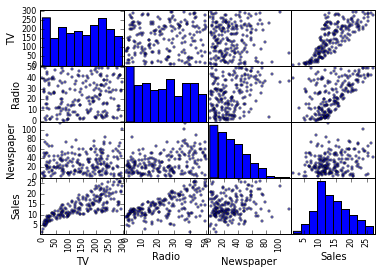

In [4]:
#Create a scatter matrix plot using pandas
pd.scatter_matrix(adv)


* Determine if TV advertisement has any impact on sell.

In [5]:
est_m=smf.ols(formula='Sales ~ TV', data=adv).fit()


In [6]:
est_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 05 Oct 2015   Prob (F-statistic):           1.47e-42
Time:                        22:06:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*TV avd has an impact on sell.

In [7]:
# Plot the data and fitted line
x_prime = pd.DataFrame({'TV': np.linspace(adv.TV.min(),
                                          adv.TV.max(), 
                                          100)})
y_hat = est_m.predict(x_prime)

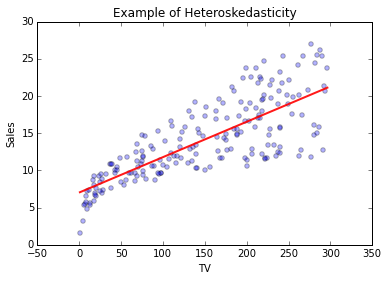

In [8]:
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Example of Heteroskedasticity")
plt.scatter(adv.TV, adv.Sales, alpha=0.3) 
plt.plot(x_prime, y_hat, 'r', linewidth=2, alpha=0.9)

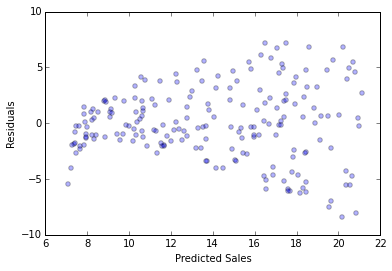

In [9]:
# View the residuals
plt.figure()
plt.scatter(est_m.predict(adv), est_m.resid, alpha=0.3)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")


* Log Transform

In [10]:
est_l = smf.ols(formula='np.log(Sales) ~ TV', data=adv).fit()

In [11]:
y_hat = est_l.predict(x_prime)

(1.5, 3.5)

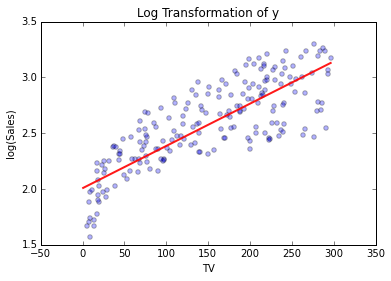

In [12]:
# Plot data
plt.figure()
plt.xlabel("TV")
plt.ylabel("log(Sales)")
plt.title("Log Transformation of y")
plt.scatter(adv.TV, np.log(adv.Sales), alpha=0.3) 
plt.plot(x_prime, y_hat, 'r', linewidth=2, alpha=0.9)
plt.ylim(1.5, 3.5)

* Multiple Regression

In [13]:
est_multi = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=adv).fit()

In [14]:
est_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 05 Oct 2015   Prob (F-statistic):           1.58e-96
Time:                        22:06:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* single LR with Newspaper

In [15]:
est_news = smf.ols(formula='Sales ~ Newspaper', data=adv).fit()

In [16]:
est_news.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 05 Oct 2015   Prob (F-statistic):            0.00115
Time:                        22:06:41   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000        11.126    13.577
Newspaper      0.0547      0.017      3.300      0.001         0.022     0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Question 
-- While condidering linear regression between Sales and Newspaper Advertisement coefficient is +ve but when it comes with all medium it is negative. What does it mean? 

In [18]:
est_tv_radio = smf.ols(formula='Sales ~ TV + Radio', data=adv).fit()

In [19]:
est_tv_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 05 Oct 2015   Prob (F-statistic):           4.83e-98
Time:                        22:07:56   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""